In [1]:
# Importing libraries
import pandas as pd 
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import geopandas as gpd
import folium
import warnings

plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [2]:
# Reading the CSV file
temp_df = pd.read_csv('Mineral ores round the world.csv')

cond = temp_df['country'] == 'India'

# Creating a df with only India's ore data
india_df = temp_df[cond]

india_df.head()

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,...,dep_type,prod_size,dev_stat,ore,gangue,work_type,names,ore_ctrl,hrock_type,arock_type
3891,Adilabad,22.88286,79.61656,AS,India,NaN,NaN,M,Manganese,NaN,...,NaN,N,Occurrence,"Birnessite, Braunite, Pyrolusite, Todorokite",Quartz,NaN,NaN,NaN,"Shale,Limestone,Chert",NaN
3892,Amatola,21.76615,80.11701,AS,India,Madhya Pradesh,NaN,M,Manganese,NaN,...,NaN,N,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3893,Banjari,21.88280,80.31701,AS,India,Madhya Pradesh,NaN,M,Manganese,NaN,...,NaN,N,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3894,Banjartola,21.95779,80.27534,AS,India,Madhya Pradesh,NaN,M,Manganese,NaN,...,NaN,M,Past Producer,"Braunite, Pyrolusite",NaN,NaN,Jagantola,NaN,"Quartzite,Schist",NaN
3895,Barbaspur,21.79947,80.10867,AS,India,Madhya Pradesh,NaN,M,Manganese,NaN,...,NaN,N,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Summary of the dataframe
print('The Dataframe has {0} Columns and {1} Rows.'.format(len(india_df.columns), len(india_df.index)))
india_df.info()

The Dataframe has 22 Columns and 781 Rows.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 781 entries, 3891 to 304383
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   site_name   781 non-null    object 
 1   latitude    781 non-null    float64
 2   longitude   781 non-null    float64
 3   region      781 non-null    object 
 4   country     781 non-null    object 
 5   state       708 non-null    object 
 6   county      0 non-null      object 
 7   com_type    781 non-null    object 
 8   commod1     391 non-null    object 
 9   commod2     25 non-null     object 
 10  commod3     413 non-null    object 
 11  oper_type   781 non-null    object 
 12  dep_type    41 non-null     object 
 13  prod_size   228 non-null    object 
 14  dev_stat    781 non-null    object 
 15  ore         74 non-null     object 
 16  gangue      27 non-null     object 
 17  work_type   47 non-null     object 
 18  names       145 non-n

In [4]:
# Percentage and No. of NaN values in each columns (Only columns with Nan Values present)
for col_name in india_df.columns:
    
    if india_df[col_name].isna().sum() == 0:
        continue
    else:
        print ( 
            'Column {0} has {1} NaN values or {2} percent'.format( 
            col_name, india_df[col_name].isna().sum(), round(india_df[col_name].isna().mean()*100 ,2)
            )
    )

Column state has 73 NaN values or 9.35 percent
Column county has 781 NaN values or 100.0 percent
Column commod1 has 390 NaN values or 49.94 percent
Column commod2 has 756 NaN values or 96.8 percent
Column commod3 has 368 NaN values or 47.12 percent
Column dep_type has 740 NaN values or 94.75 percent
Column prod_size has 553 NaN values or 70.81 percent
Column ore has 707 NaN values or 90.52 percent
Column gangue has 754 NaN values or 96.54 percent
Column work_type has 734 NaN values or 93.98 percent
Column names has 636 NaN values or 81.43 percent
Column ore_ctrl has 766 NaN values or 98.08 percent
Column hrock_type has 707 NaN values or 90.52 percent
Column arock_type has 765 NaN values or 97.95 percent


In [5]:
# Cleaning the df
# Dropping unnecessary columns
india_df.drop( columns= ['county','region', 'prod_size', 'ore_ctrl', 'country','names'], inplace= True)

india_df.head()

,site_name,latitude,longitude,state,com_type,commod1,commod2,commod3,oper_type,dep_type,dev_stat,ore,gangue,work_type,hrock_type,arock_type
3891,Adilabad,22.88286,79.61656,NaN,M,Manganese,NaN,NaN,Unknown,NaN,Occurrence,"Birnessite, Braunite, Pyrolusite, Todorokite",Quartz,NaN,"Shale,Limestone,Chert",NaN
3892,Amatola,21.76615,80.11701,Madhya Pradesh,M,Manganese,NaN,NaN,Unknown,NaN,Occurrence,NaN,NaN,NaN,NaN,NaN
3893,Banjari,21.88280,80.31701,Madhya Pradesh,M,Manganese,NaN,NaN,Unknown,NaN,Occurrence,NaN,NaN,NaN,NaN,NaN
3894,Banjartola,21.95779,80.27534,Madhya Pradesh,M,Manganese,NaN,NaN,Unknown,NaN,Past Producer,"Braunite, Pyrolusite",NaN,NaN,"Quartzite,Schist",NaN
3895,Barbaspur,21.79947,80.10867,Madhya Pradesh,M,Manganese,NaN,NaN,Unknown,NaN,Occurrence,NaN,NaN,NaN,NaN,NaN


**STATE WISE COMMODITIES LIST**

In [6]:
# First lets create a duplicate datafraem containing states and commodities column only
india_df_commod = india_df.loc[ : , ['state', 'commod1', 'commod2', 'commod3']]

# Removing rows with NaN state value
india_df_commod.dropna( subset = ['state'],axis= 0, inplace= True)

# List of State 
state_list = india_df_commod['state'].unique()

Dicts = [ ]
temp_commd_list = []

for index in range(len(state_list)):

    lst =[]
    temp_list = []
    new_list = []
    flat_list = []
    flat_list_final = []

    state_name = state_list[index]
    x = india_df_commod['state'] == state_list[index]
    ex = india_df_commod[x].drop_duplicates()

    for index, row in ex.iterrows():
        lst.append(row['commod1'])
        lst.append(row['commod2'])
        lst.append(row['commod3'])

    for item in lst:
        if str(item) != 'nan':
            new_list.append(item)
    new_list

    
    for items in new_list:
        if ',' in items:
            temp_list.append(items.split(','))
        else:
            temp_list.append(items)
    temp_list

    for element in temp_list:
        if type(element) is list:
            # do split and append
            for inside_el in element:
                flat_list.append(inside_el)
        else:
            # do only append
            flat_list.append(element)

    for l in range (len(flat_list)):
       temp_commd_list.append(flat_list[l])

    
    for var in flat_list:
        flat_list_final.append(var.strip())

    d = {'State': state_name, 'Commodities Present' : list(set(flat_list_final))}
   
    Dicts.append(d) 

    del lst ,temp_list ,new_list ,flat_list ,flat_list_final

In [7]:
state_mineral_df = pd.DataFrame(Dicts)

print(tabulate(state_mineral_df, headers= ['STATE', 'COMMODITIES PRESENT'], tablefmt= 'grid', showindex= False))

+-----------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| STATE                       | COMMODITIES PRESENT                                                                                                                                                                                                                                                                                                                 |
+=============================+=============================================================================================================================================================================================================================================================

**STATE WISE TOTAL NO OF COMMODITIES**

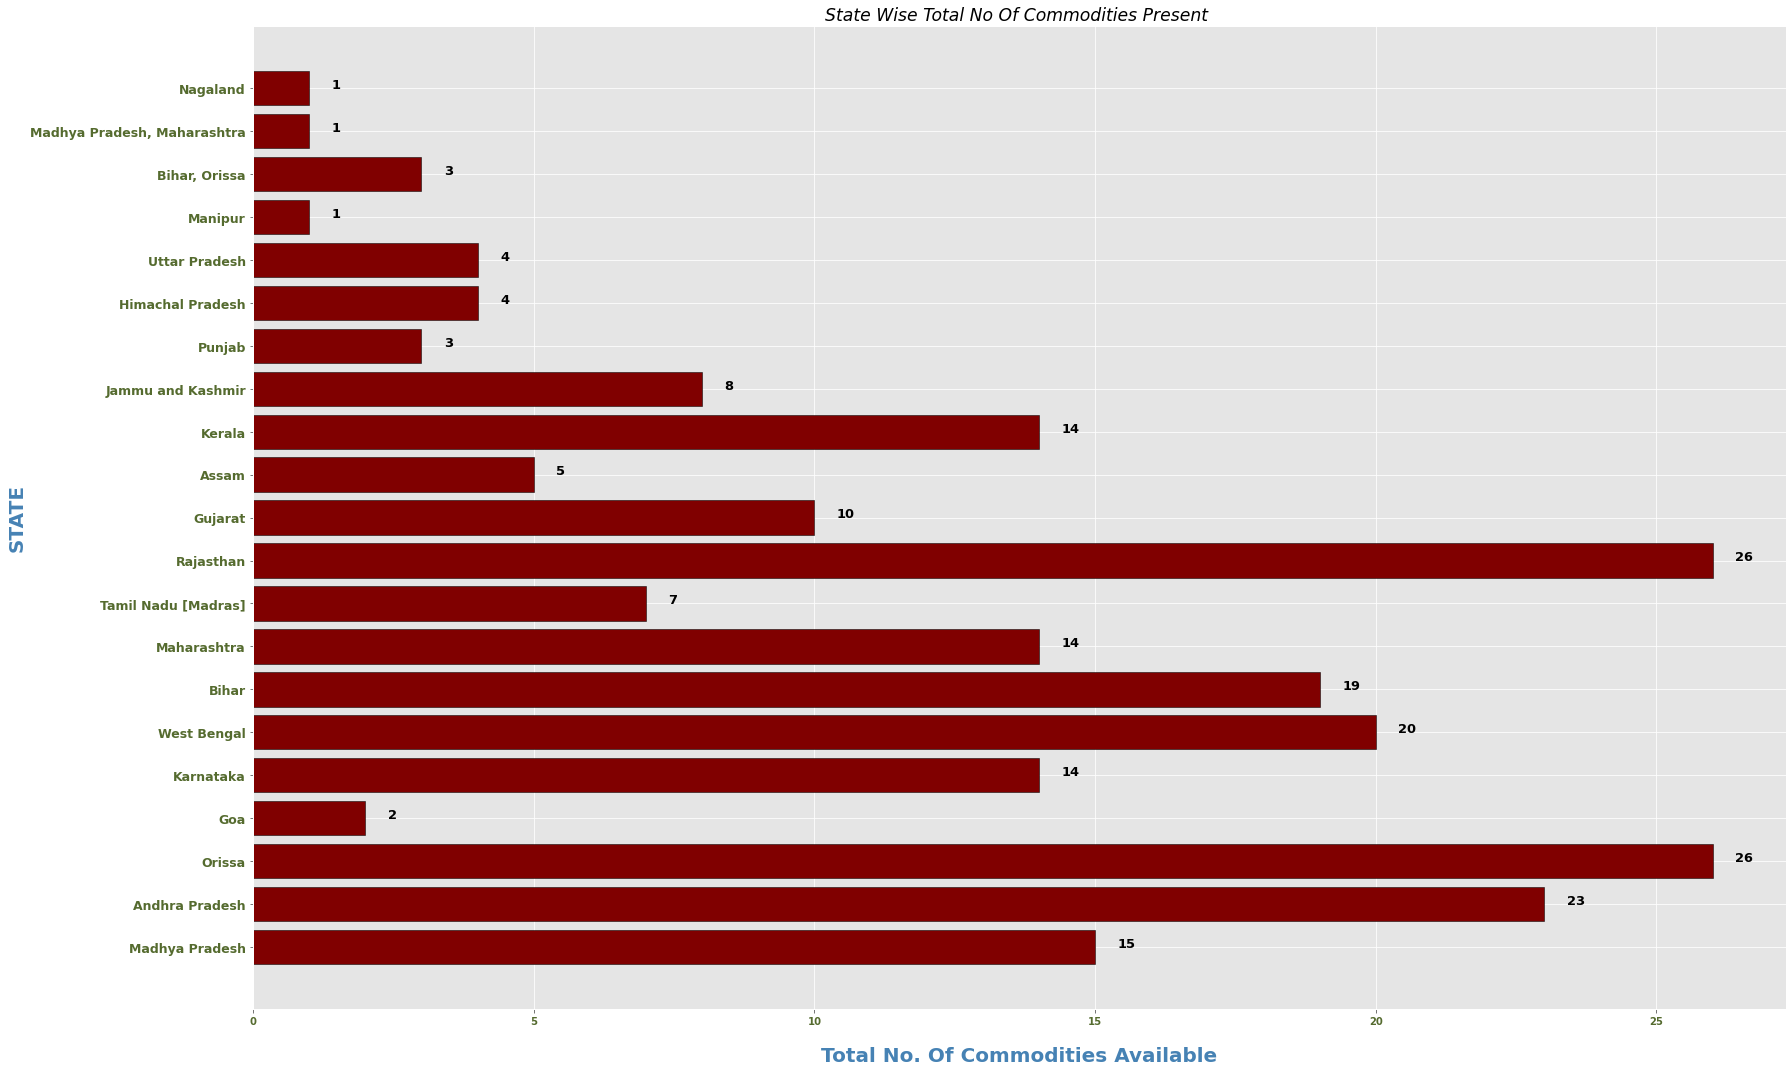

In [8]:
fig = plt.figure( figsize= (25,15))

total_commodities = []

for df_len in range(len(state_mineral_df)):
    total_commodities.append(len(state_mineral_df.loc[ df_len, 'Commodities Present']))

plt.barh( y= state_mineral_df['State'], width= total_commodities, color = 'maroon', edgecolor= 'black')

# Figure customization
plt.ylabel('STATE', color = 'steelblue', fontweight ='bold', fontsize = 20)
plt.xlabel('Total No. Of Commodities Available', color = 'steelblue', fontweight ='bold', fontsize = 20, labelpad= 20)
plt.title('State Wise Total No Of Commodities Present ', fontsize = 'xx-large', fontstyle =  'italic')

plt.yticks(color = 'darkolivegreen', fontsize= 12.5, fontweight = 'bold' )
plt.xticks(color = 'darkolivegreen', fontsize= 10, fontweight = 'bold' )

for index, val in enumerate(total_commodities):
    plt.annotate(text= val, xy= (int(val)+0.4, index), 
                fontsize = 13, fontweight ='bold',
                color ='black' )

plt.tight_layout()
plt.show()


**TOP 10 STATES BY NO. OF COMMODITIES**

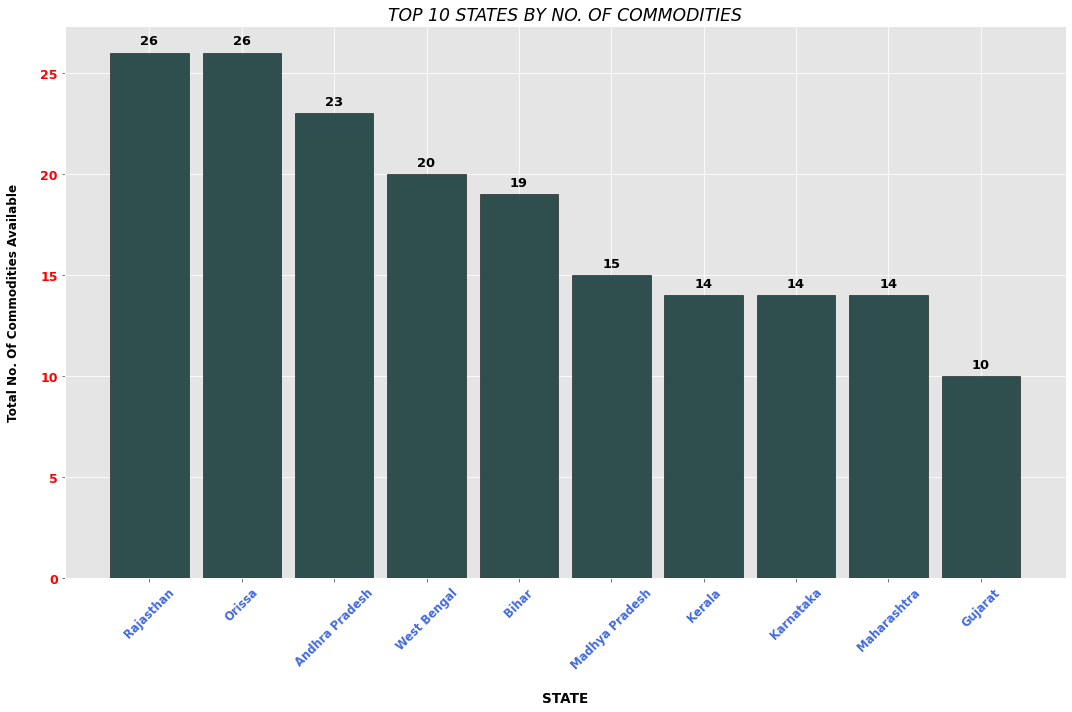

In [9]:
fig = plt.figure(figsize= (15,10))

# Creating an empty column
state_mineral_df['Total'] = ''

# Adding total no. of commdoties present in each state in empty column 
for df_len in range(len(state_mineral_df)):
    state_mineral_df.loc[df_len, 'Total'] =  len(state_mineral_df.loc[ df_len, 'Commodities Present'])

temp_df = state_mineral_df.sort_values(by= 'Total', ascending= False).reset_index()

# Slicing and Storing only the Top 10 State by total commodites no.
top5_commd_state_df = temp_df.loc[ 0:9, ['State', 'Total']]

plt.bar( x= top5_commd_state_df['State'], height= top5_commd_state_df['Total'], width= 0.85, color= 'darkslategrey', edgecolor= 'black')

# Figure customization
plt.xlabel('STATE', color = 'black', fontweight ='bold', fontsize = 13.5, labelpad= 20)
plt.ylabel('Total No. Of Commodities Available', color = 'black', fontweight ='bold', fontsize = 12, labelpad= 20)
plt.title('TOP 10 STATES BY NO. OF COMMODITIES', fontsize = 'xx-large', fontstyle =  'italic')

plt.yticks(color = 'red', fontsize= 12.5, fontweight = 'bold')
plt.xticks(color = 'royalblue', fontsize= 11.5, fontweight = 'bold', rotation= 45 )

for index, val in enumerate(top5_commd_state_df['Total']):
    plt.annotate(text= val, xy= ( index - 0.1, int(val)+0.4 ), 
                fontsize = 13, fontweight ='bold',
                color ='black' )
plt.tight_layout()

**LIST OF ALL COMMODITY**

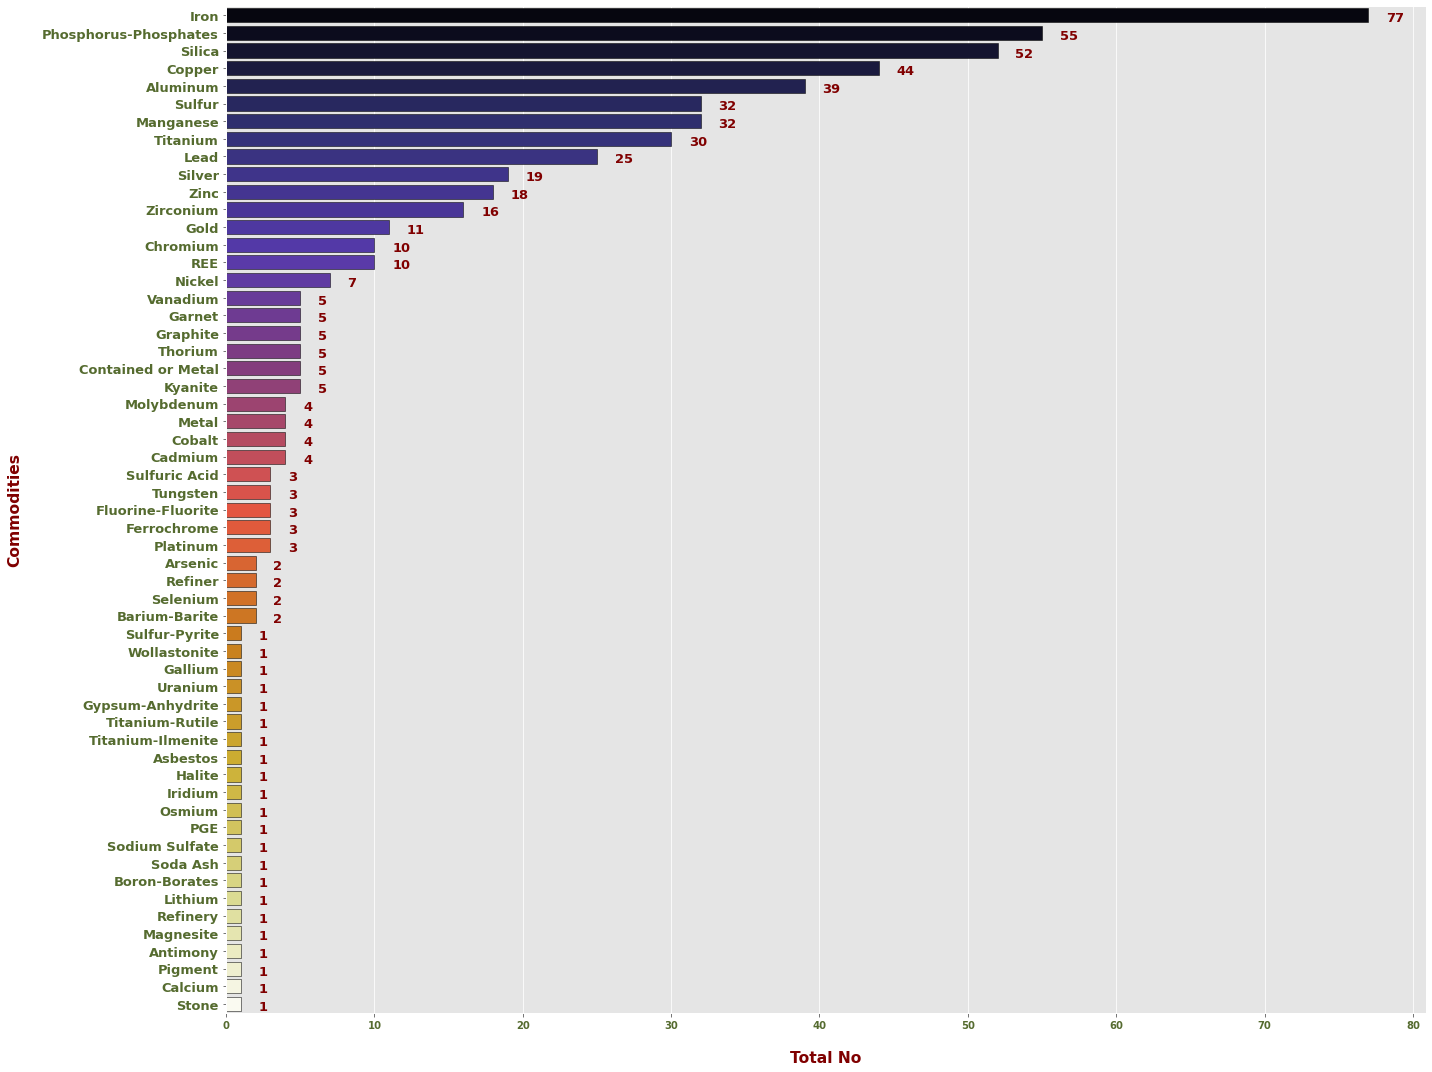

In [10]:
all_commod_list = []

for el in temp_commd_list:
    all_commod_list.append(el.strip())

temp_all_commod_df = pd.DataFrame(all_commod_list)
temp_all_commod_df.rename(columns= {0 : 'Commodities'}, inplace= True)

all_commod_df= pd.DataFrame(temp_all_commod_df.value_counts())
all_commod_df.reset_index(inplace= True)
all_commod_df.rename(columns= { 0 : 'Total'}, inplace= True)

fig, ax = plt.subplots( figsize= (20,15))

ax = sns.barplot( y= all_commod_df['Commodities'], x= all_commod_df.Total, orient= 'h', palette = "CMRmap", edgecolor= 'black')

# Figure Customization
ax.set_xlabel('Total No', color = 'maroon', fontweight ='bold', fontsize = 15.5, labelpad= 20)
ax.set_ylabel('Commodities', color = 'maroon', fontweight ='bold', fontsize = 15.5, labelpad= 20)

ax.set_yticklabels( labels= all_commod_df['Commodities'], color = 'darkolivegreen', fontsize= 13, fontweight = 'bold' )
ax.set_xticklabels( labels= [0,10,20,30,40,50,60,70,80], color = 'darkolivegreen', fontsize= 10, fontweight = 'bold' )

for index, val in enumerate(all_commod_df['Total']):
    ax.annotate(text= val, xy= (int(val) + 1.2, index + 0.35), 
                fontsize = 13, fontweight ='bold',
                color ='maroon' )

plt.tight_layout()
plt.show()

**PLOTS OF TOTAL COMMODITIES LIST(STATE WISE)** 

In [11]:
test_df = india_df_commod.melt(
                    id_vars= 'state',
                    value_name= 'Commodities'
                    )
test_df.drop(columns= 'variable', inplace= True)

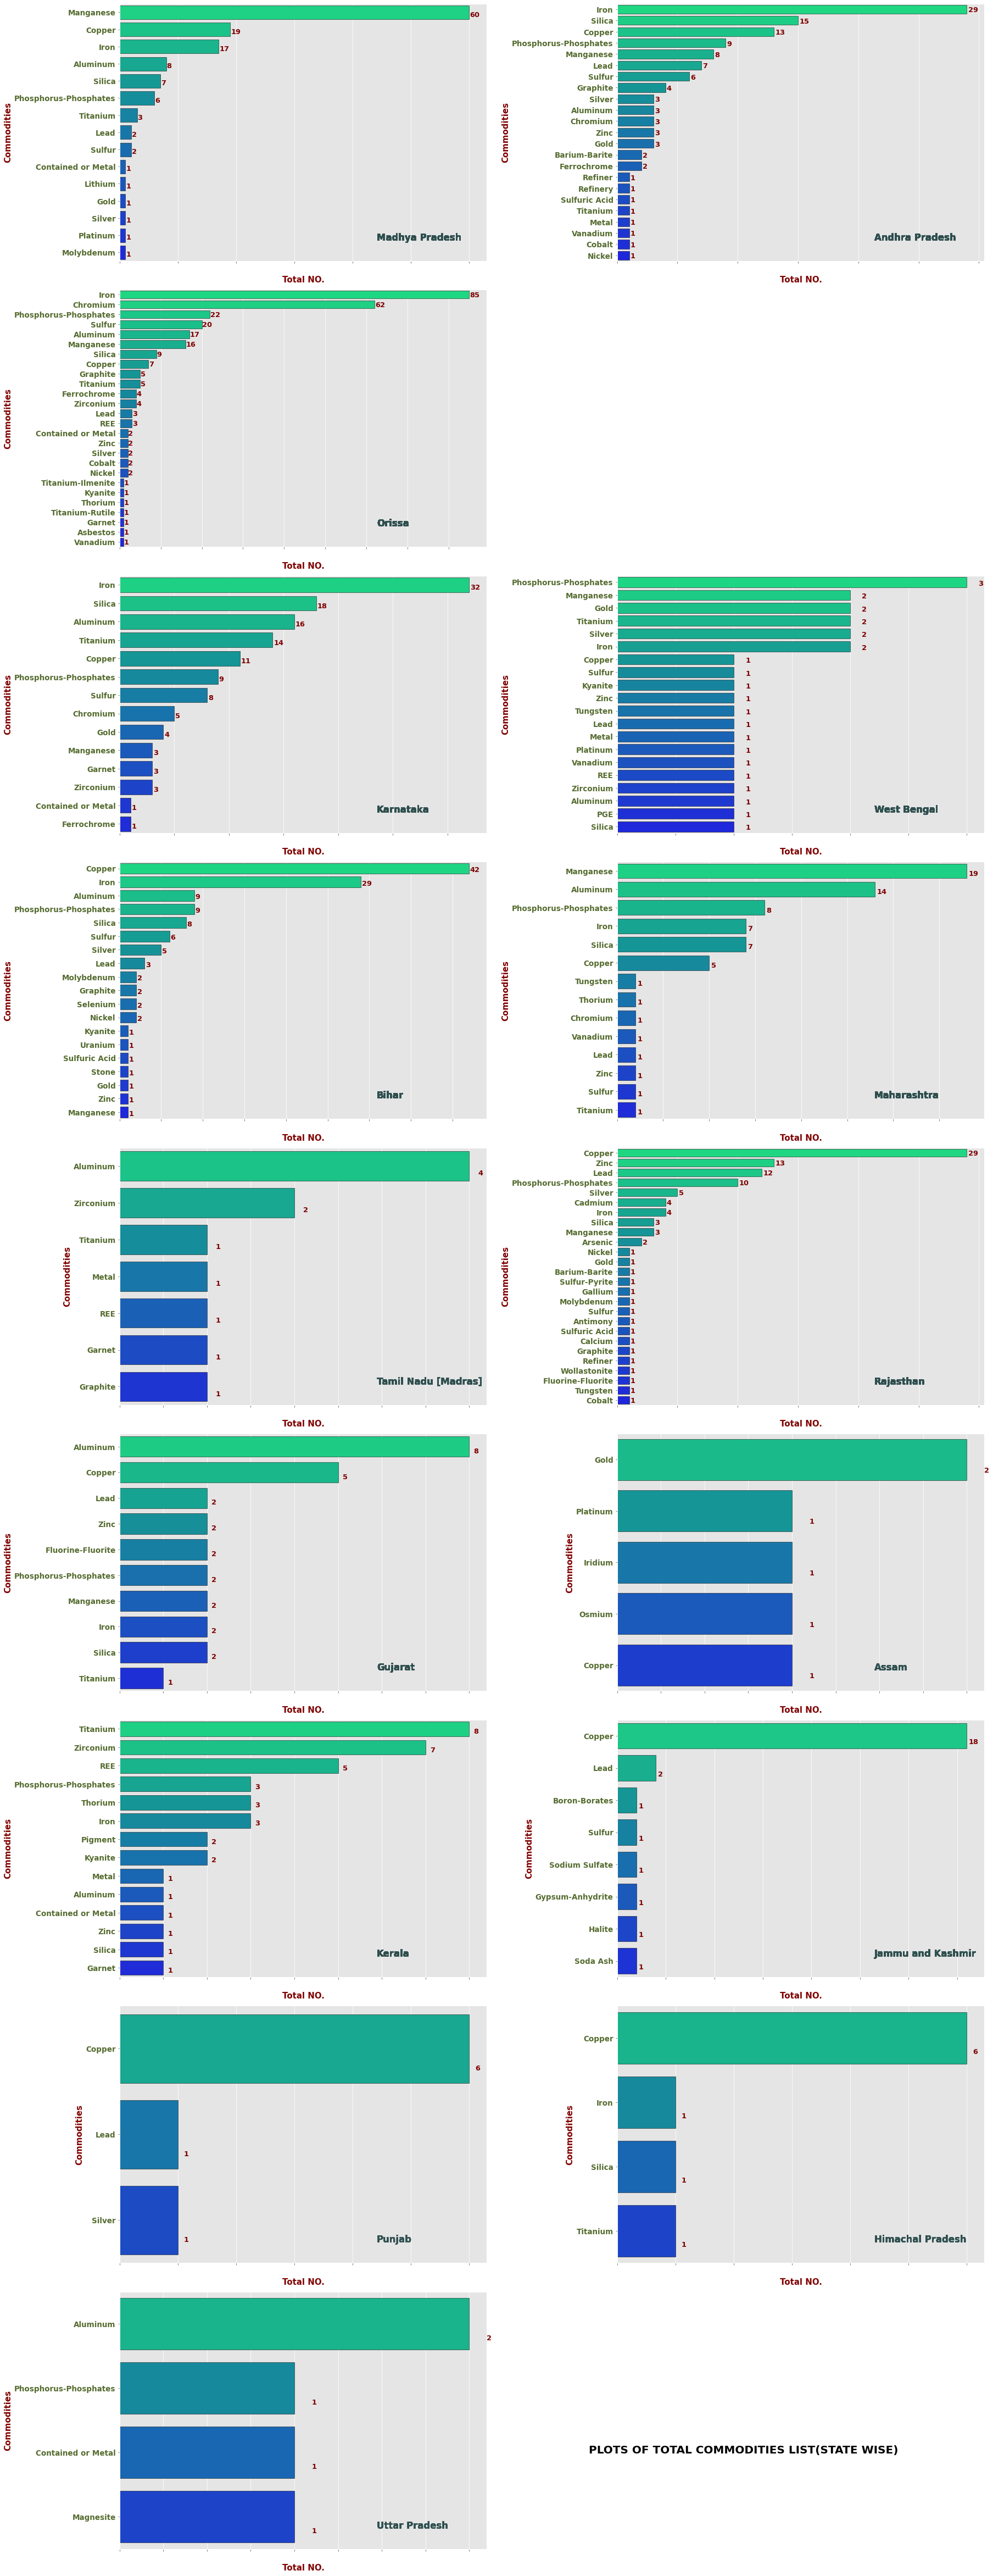

In [21]:
fig, ax = plt.subplots( 9, 2, figsize= (25,65), constrained_layout= True)
ax = ax.flatten() # Transforming  nd.Array of Axes objects into list of Axes objects 
fig.suptitle('PLOTS OF TOTAL COMMODITIES LIST(STATE WISE)',  x=0.75, y = 0.05, fontsize = 20,
              fontweight ="bold")

for index in range(len(state_list)):

    state_name = state_list[index]

    if state_name in ['Nagaland', 'Goa', 'Manipur', 'Madhya Pradesh, Maharashtra' , 'Bihar, Orissa']:
        continue
    else:
        cond = test_df['state'] == state_list[index]
        temp_state_mineral_df2 = pd.DataFrame(test_df[cond])
        temp_state_mineral_df2.dropna( subset= 'Commodities', axis=0, inplace= True)

        temp_list = []
        flat_list = []

        for element in temp_state_mineral_df2.Commodities:
            if ',' in element:
                temp_list.append(element.split(','))
            else:
                temp_list.append(element)
        for element in temp_list:
                if type(element) is list:
                    # do split and append
                    for inside_el in element:
                        flat_list.append(inside_el.strip())
                else:
                    # do only append
                    flat_list.append(element.strip())
    
        tempSeries = pd.Series(flat_list)
        state_commod_Df= pd.DataFrame(tempSeries.value_counts(), columns= ['Total'])

        sns.barplot( x= state_commod_Df['Total'], y= state_commod_Df.index, orient= 'h', ax =ax[index], palette = "winter_r", edgecolor  = 'black')
        
        # Plot Customization
        ax[index].set_xlabel('Total NO.', color = 'maroon', fontweight ='bold', fontsize = 15, labelpad= 20)
        ax[index].set_ylabel('Commodities', color = 'maroon', fontweight ='bold', fontsize = 15)

        ax[index].set_yticklabels( labels= state_commod_Df.index, color = 'darkolivegreen', fontsize= 13.5, fontweight = 'bold' )
        ax[index].set_xticklabels([])

        for ind, val in enumerate(state_commod_Df['Total']):
            ax[index].text( 0.70, 0.08, s= state_name, 
                fontsize = 16.5, fontweight= 'demi',
                color ='darkslategrey', transform= ax[index].transAxes )
            
            ax[index].annotate( text= val, xy= (int(val)+ 0.1 , ind + 0.25), fontsize = 13, fontweight ='bold',
                color ='maroon')

        
        del tempSeries, state_commod_Df, flat_list, temp_list, temp_state_mineral_df2 

ax[3].remove()
ax[17].remove()